In [1]:
import warnings
warnings.filterwarnings('ignore')

## 비지도 학습
- Target이 없는 데이터를 분류하기
- 군집화, 차원축소

---
### 군집 알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 3분류하기

In [2]:
import numpy as np

fruits = np.load('../data/fruits.npy')
fruits.shape

(300, 100, 100)

> 흑백이미지  
300개의 이미지가 100*100 픽셀로 구성되어 있음  
사과가 100개, 파인애플 100개, 바나나 100개

In [3]:
import matplotlib.pyplot as plt

In [4]:
fruits

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [5]:
# 사과 이미지 보기 : 이미지로 확인하기

import matplotlib.pyplot as plt

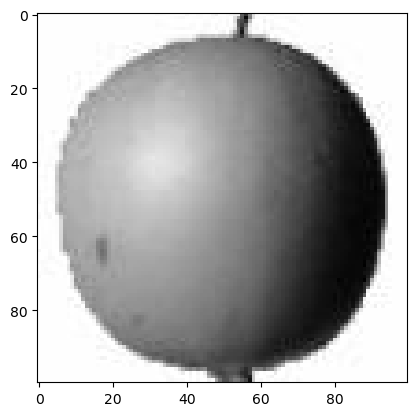

In [6]:
plt.imshow(
    fruits[0],
    cmap='gray_r'
)

plt.show()

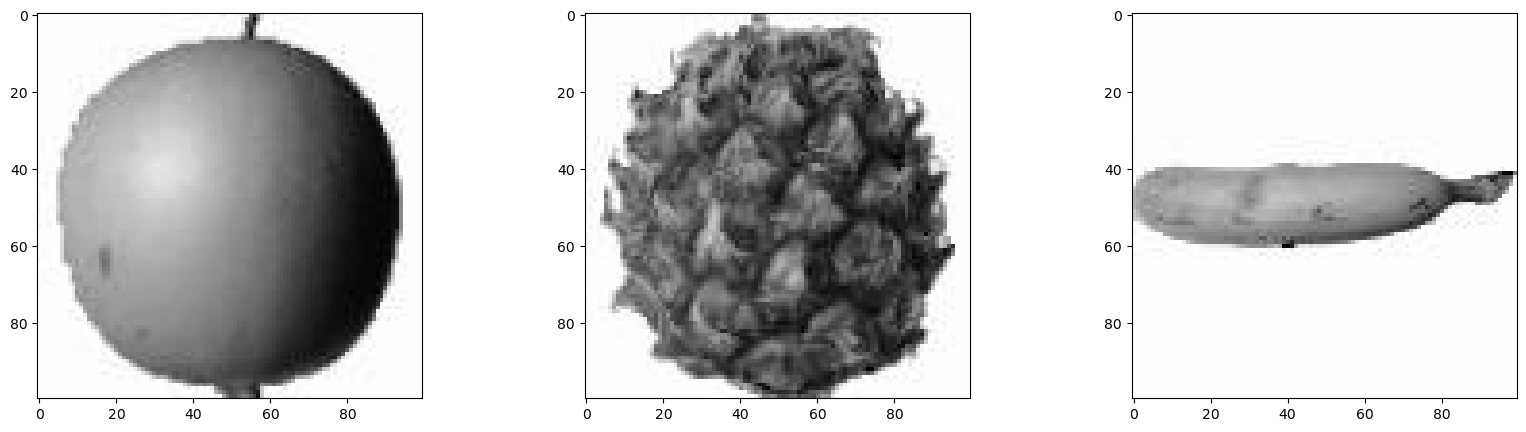

In [7]:
# 사과, 파인애플, 바나나 이미지를 나란히 보기

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].imshow(fruits[0], cmap = 'gray_r')
ax[1].imshow(fruits[100], cmap = 'gray_r')
ax[2].imshow(fruits[200], cmap = 'gray_r')


### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경하기
- 배열중 page단의 수는 apple, pineapple, banana로 분류하게 변경하기

In [8]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [40]:
apple.mean(axis=0).shape

(10000,)

In [39]:
apple.mean(axis=1).shape

(100,)

### 픽셀값 분석하기

In [10]:
# apple의 sample별(행별) 평균 구하기
apple.mean(axis=1)

array([ 88.4588,  98.0594,  87.4831,  98.4898,  92.9991,  82.7579,
        94.536 ,  95.7095,  90.7508,  81.7788,  87.1803,  95.2125,
        93.9517,  87.1466,  97.6411,  87.3593,  89.0571, 101.0366,
        92.8971, 101.0462, 105.0824,  88.7961,  99.6585,  97.359 ,
        94.2293,  92.2932,  95.2592,  93.4393, 103.0312,  94.7767,
        90.6388,  89.1673,  97.8923,  97.4053, 100.8732,  90.6799,
       100.3753,  85.9834,  96.5866,  97.2989,  90.8155, 102.4502,
        87.3238,  89.9929,  86.8717,  86.4904,  95.3862,  89.289 ,
        96.9175,  91.782 ,  96.2412,  99.7925,  95.1062,  87.5648,
        89.3416,  89.6668,  93.9096,  97.5639,  87.2779,  97.9526,
       103.3378,  94.5728,  83.8009,  83.6077, 102.9481,  87.1496,
        91.3842, 100.5921,  93.9603,  90.9806,  97.5707,  97.574 ,
        82.5605,  87.2897,  97.0628,  90.4258,  90.6506,  97.741 ,
        98.1869,  93.7264,  87.536 ,  84.8565,  89.2303,  86.8919,
        88.8434,  86.7783,  96.8703,  97.3682,  82.0917,  87.3

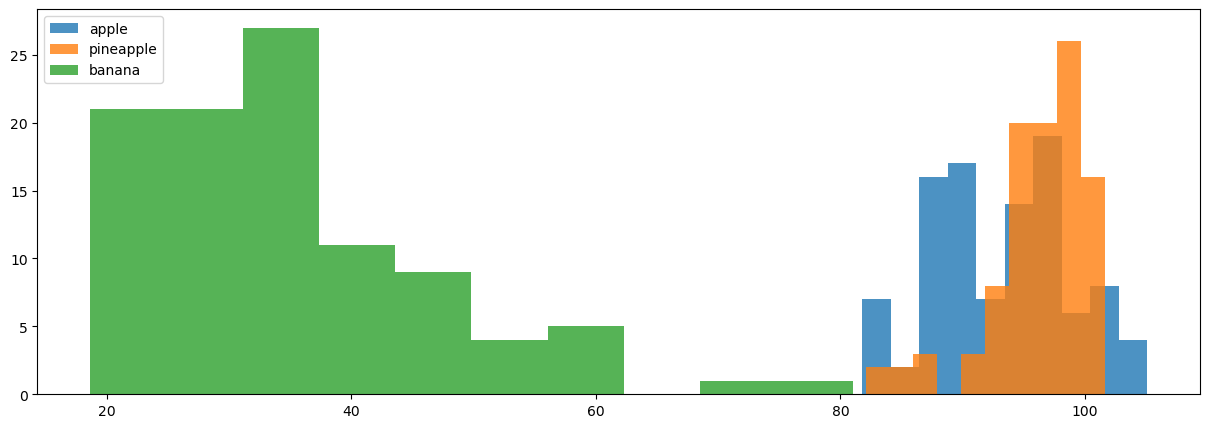

In [11]:
# 과일별 빈도수를 히스토그램으로 표현하기
plt.figure(figsize=(15, 5))

plt.hist(np.mean(apple, axis=1) ,alpha = 0.8)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.8)
plt.hist(np.mean(banana, axis=1), alpha = 0.8)

plt.legend(['apple', 'pineapple', 'banana'])

plt.show()

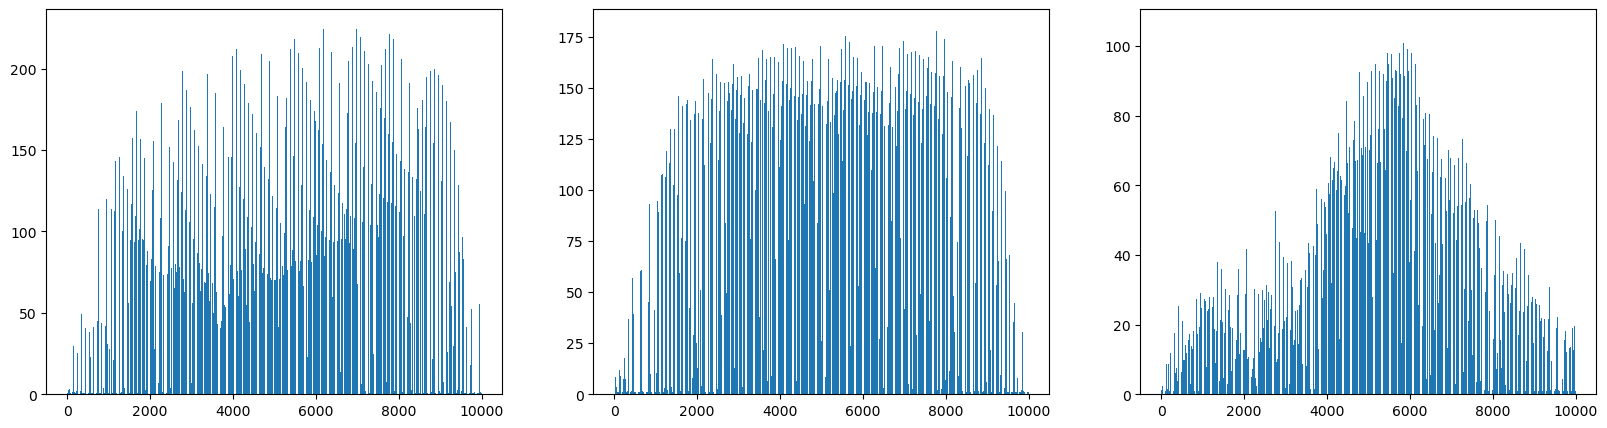

In [12]:
# Feature별(픽셀별) 평균의 막대그래프

fig, axes = plt.subplots(1, 3, figsize = (20, 5))
axes[0].bar(range(10000), np.mean(apple, axis=0))
axes[1].bar(range(10000), np.mean(pineapple, axis=0))
axes[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()

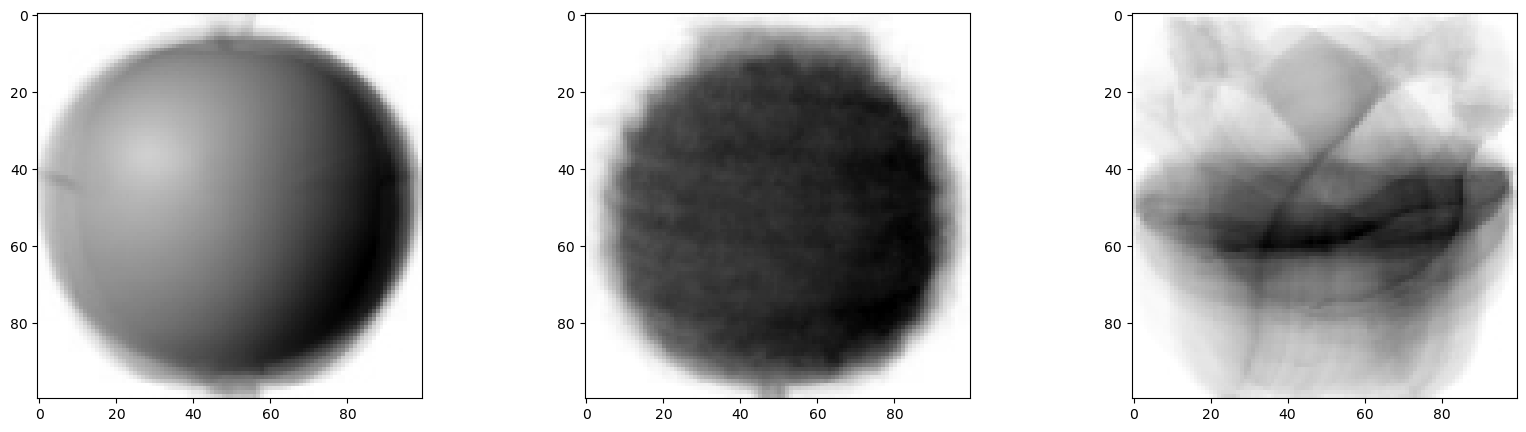

In [13]:
# 평균 이미지로 그림 표현하기 : 이미지로 그리기 위해 다시 2차원 배열로 변경한다.

apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)


fig, axes = plt.subplots(1, 3, figsize = (20, 5))

axes[0].imshow(apple_mean, cmap = 'gray_r')
axes[1].imshow(pineapple_mean, cmap = 'gray_r')
axes[2].imshow(banana_mean, cmap = 'gray_r')


plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다. 
- 사과만 잘 분류하는지 시도

In [14]:
np.array([1, 2,3]) - np.array([1, 1, 1])

array([0, 1, 2])

In [15]:
abs_diff = np.abs(fruits - apple_mean)

abs_diff.shape


(300, 100, 100)

In [16]:
abs_mean = np.mean(abs_diff, axis=(1, 2))

abs_mean.shape

(300,)

In [17]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요하므로 arg.sort를 사용한다.



apple_index =  np.argsort(abs_mean)[:100]

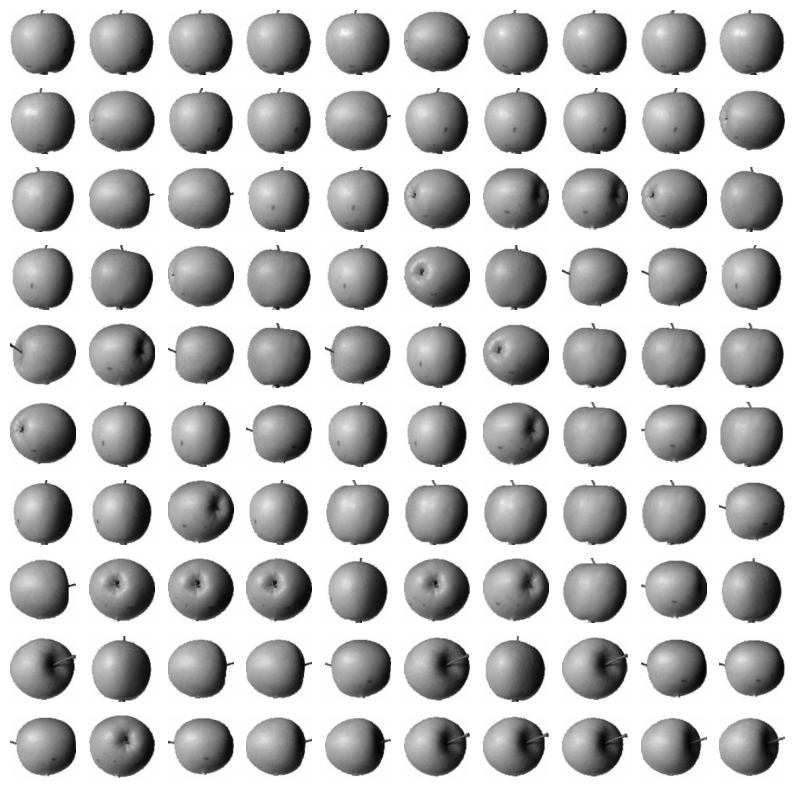

In [18]:
# 그림 그려보기

fig, axes = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
    for j in range(10):
        axes[i,j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
        axes[i,j].axis('off')

plt.show()


---
### 바나나로 확인해보기

In [19]:
abs_diff = np.abs(fruits - banana_mean)

abs_diff.shape


(300, 100, 100)

In [20]:
abs_mean = np.mean(abs_diff, axis=(1, 2))

abs_mean.shape

(300,)

In [21]:
banana_index =  np.argsort(abs_mean)[:100]

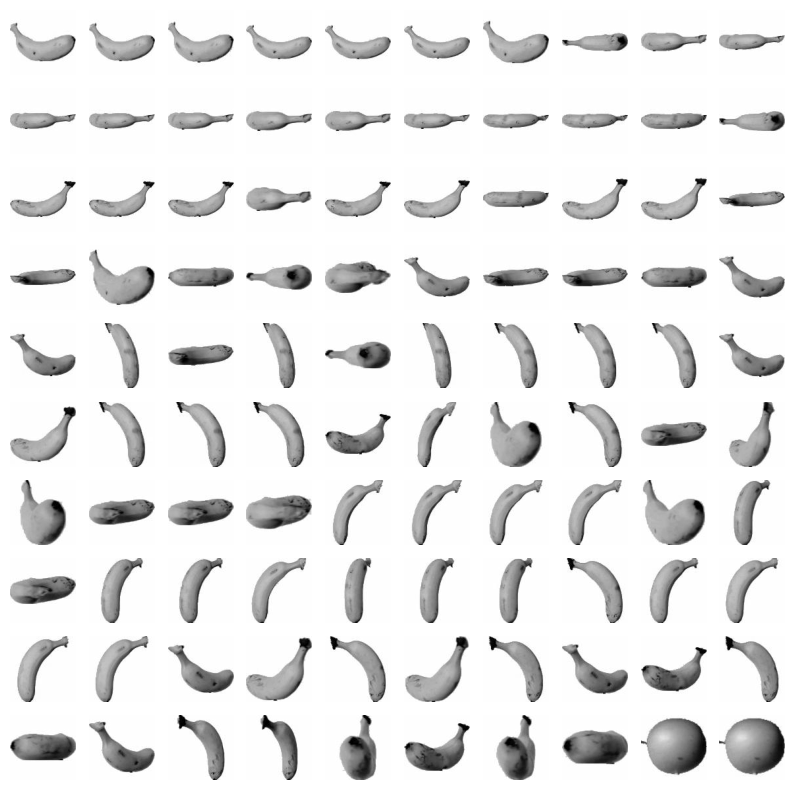

In [22]:
fig, axes = plt.subplots(10, 10, figsize = (10, 10))

for i in range(10):
    for j in range(10):
        axes[i,j].imshow(fruits[banana_index[i*10 + j]], cmap = 'gray_r')
        axes[i,j].axis('off')

plt.show()


In [23]:
banana_index_double =  np.argsort(abs_mean)[:200]

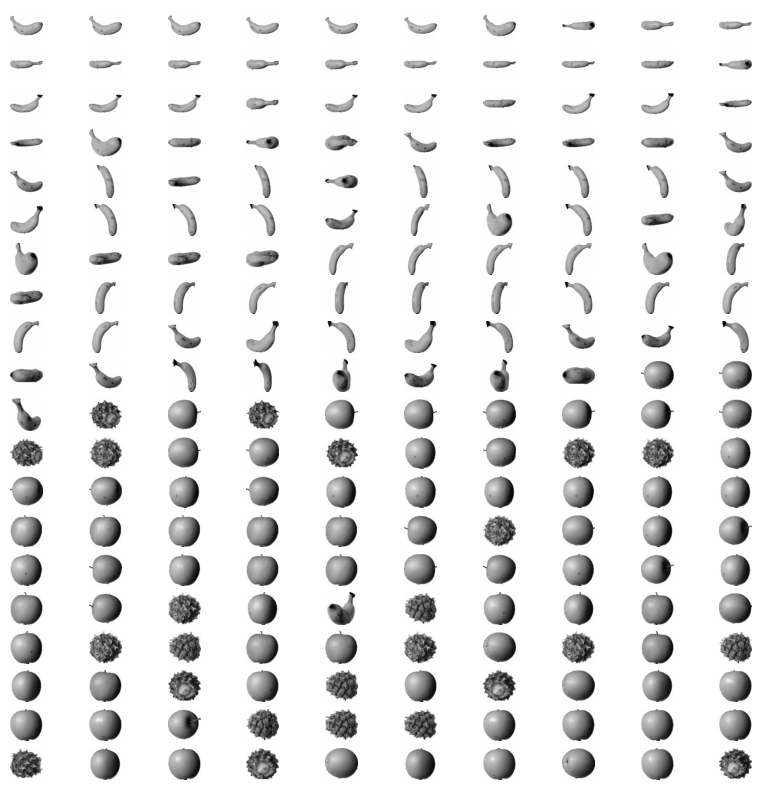

In [29]:
fig, axes = plt.subplots(20, 10, figsize = (10, 10))

for i in range(10):
    for j in range(10):
        axes[i,j].imshow(fruits[banana_index_double[i*10 + j]], cmap = 'gray_r')
        axes[i,j].axis('off')

for i in range(10):
    for j in range(10):
        axes[i+10,j].imshow(fruits[banana_index_double[100 + i*10 + j]], cmap = 'gray_r')
        axes[i+10,j].axis('off')

plt.show()